Sistem Rekomendasi Sederhana, seperti namanya adalah sistem rekomendasi yang hanya menggunakan urutan sebagai dasar perhitungannya, yang biasanya digunakan dalam '5 film terbaik' kita akan menggunakan urutan berdasarkan mungkin vote terbanyak, rating tertinggi, penjualan film paling tinggi, atau apapun yang lain.
Dalam kasus ini, kita akan menggunakan kombinasi antara rata-rata rating, jumlah vote, dan membentuk metric baru dari metric yang sudah ada, kemudian kita akan melakukan sorting untuk metric ini dari yang tertinggi ke terendah.

Simple Recommender Engine menawarkan rekomendasi yang umum untuk semua user berdasarkan popularitas film dan terkadang genre.

Ide awal di balik sistem rekomendasi ini adalah sebagai berikut.

*   Film-film yang lebih populer akan memiliki kemungkinan yang lebih besar untuk disukai juga oleh rata-rata penonton.

*   Model ini tidak memberikan rekomendasi yang personal untuk setiap tipe user. 

*   Implementasi model ini pun juga bisa dibilang cukup mudah, yang perlu kita lakukan hanyalah mengurutkan film-film tersebut berdasarkan rating dan popularitas dan menunjukkan film teratas dari list film tersebut.

Sebagai tambahan, kita dapat menambahkan genre untuk mendapatkan film teratas untuk genre spesifik tersebut

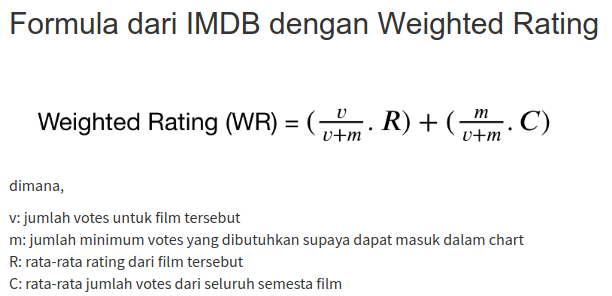

**IMPORT LIBRARY**

In [1]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np

#lakukan pembacaan dataset
movie_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.basics.tsv', sep='\t') #untuk menyimpan title_basics.tsv
rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.ratings.tsv', sep='\t') #untuk menyimpan title.ratings.tsv

**5 DATA TERATAS DENGAN FUNGSU HEAD**

In [2]:
movie_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0221078,short,"Circle Dance, Ute Indians","Circle Dance, Ute Indians",0,1898,\N,\N,"Documentary,Short"
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0,2018,\N,\N,"Comedy,Drama"
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0,2016,\N,29,"Comedy,Game-Show"
3,tt2974998,tvEpisode,Episode dated 16 May 1987,Episode dated 16 May 1987,0,1987,\N,\N,News
4,tt2903620,tvEpisode,Frances Bavier: Aunt Bee Retires,Frances Bavier: Aunt Bee Retires,0,1973,\N,\N,Documentary


**MELIHAT JENIS DATA YANG ADA**

In [3]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9025 entries, 0 to 9024
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          9025 non-null   object
 1   titleType       9025 non-null   object
 2   primaryTitle    9011 non-null   object
 3   originalTitle   9011 non-null   object
 4   isAdult         9025 non-null   int64 
 5   startYear       9025 non-null   object
 6   endYear         9025 non-null   object
 7   runtimeMinutes  9025 non-null   object
 8   genres          9014 non-null   object
dtypes: int64(1), object(8)
memory usage: 634.7+ KB


**MELIHAT DATA YANG BERNILAI NULL**

In [4]:
movie_df.isnull().sum()

tconst             0
titleType          0
primaryTitle      14
originalTitle     14
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres            11
dtype: int64

**ANALASIS DATA YANG MEMILIKI NILAI NULL PART 1**

In [6]:
movie_df.loc[(movie_df['primaryTitle'].isnull()) | (movie_df['originalTitle'].isnull())]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
9000,tt10790040,tvEpisode,NaN,NaN,0,2019,\N,\N,\N
9001,tt10891902,tvEpisode,NaN,NaN,0,2020,\N,\N,Crime
9002,tt11737860,tvEpisode,NaN,NaN,0,2020,\N,\N,"Comedy,Drama,Romance"
9003,tt11737862,tvEpisode,NaN,NaN,0,2020,\N,\N,"Comedy,Drama,Romance"
9004,tt11737866,tvEpisode,NaN,NaN,0,2020,\N,\N,"Comedy,Drama,Romance"
9005,tt11737872,tvEpisode,NaN,NaN,0,2020,\N,\N,\N
9006,tt11737874,tvEpisode,NaN,NaN,0,2020,\N,\N,"Comedy,Drama,Romance"
9007,tt1971246,tvEpisode,NaN,NaN,0,2011,\N,\N,Biography
9008,tt2067043,tvEpisode,NaN,NaN,0,1965,\N,\N,Music
9009,tt4404732,tvEpisode,NaN,NaN,0,2015,\N,\N,Comedy


**MEMBUANG NILAI NULL PART 1**

In [7]:
#mengupdate movie_df dengan membuang data-data bernilai NULL
movie_df = movie_df.loc[(movie_df['primaryTitle'].notnull()) & (movie_df['originalTitle'].notnull())]

#menampilkan jumlah data setelah data dengan nilai NULL dibuang
print(len(movie_df))

9011


**ANALASIS DATA YANG MEMILIKI NILAI NULL PART 2**

In [9]:
movie_df.loc[movie_df['genres'].isnull()]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
9014,tt10233364,tvEpisode,Rolling in the Deep Dish\tRolling in the Deep ...,0,2019,\N,\N,Reality-TV,NaN
9015,tt10925142,tvEpisode,The IMDb Show on Location: Star Wars Galaxy's ...,0,2019,\N,\N,Talk-Show,NaN
9016,tt10970874,tvEpisode,Die Bauhaus-Stadt Tel Aviv - Vorbild für die M...,0,2019,\N,\N,\N,NaN
9017,tt11670006,tvEpisode,...ein angenehmer Unbequemer...\t...ein angene...,0,1981,\N,\N,Documentary,NaN
9018,tt11868642,tvEpisode,GGN Heavyweight Championship Lungs With Mike T...,0,2020,\N,\N,Talk-Show,NaN
9019,tt2347742,tvEpisode,No sufras por la alergia esta primavera\tNo su...,0,2004,\N,\N,\N,NaN
9020,tt3984412,tvEpisode,"I'm Not Going to Come Last, I'm Just Going to ...",0,2014,\N,\N,Reality-TV,NaN
9021,tt8740950,tvEpisode,Weight Loss Resolution Restart - Ins & Outs of...,0,2015,\N,\N,Reality-TV,NaN
9022,tt9822816,tvEpisode,Zwischen Vertuschung und Aufklärung - Missbrau...,0,2019,\N,\N,\N,NaN
9023,tt9900062,tvEpisode,The Direction of Yuu's Love: Hings Aren't Goin...,0,1994,\N,\N,"Animation,Comedy,Drama",NaN


**MEMBUANG NILAI NULL PART 2**

In [10]:
#mengupdate movie_df dengan membuang data-data bernilai NULL
movie_df = movie_df.loc[movie_df['genres'].notnull()]

#menampilkan jumlah data setelah data dengan nilai NULL dibuang
print(len(movie_df))

9000


**MENGUBAH NILAI '\N'**

In [11]:
#mengubah nilai '\\N' pada startYear menjadi np.nan dan cast kolomnya menjadi float64
movie_df['startYear'] = movie_df['startYear'].replace('\\N', np.nan)
movie_df['startYear'] = movie_df['startYear'].astype('float64')

print(movie_df['startYear'].unique()[:5])
#mengubah nilai '\\N' pada endYear menjadi np.nan dan cast kolomnya menjadi float64
movie_df['endYear'] = movie_df['endYear'].replace('\\N', np.nan)
movie_df['endYear'] = movie_df['endYear'].astype('float64')
print(movie_df['endYear'].unique()[:5])

#mengubah nilai '\\N' pada runtimeMinutes menjadi np.nan dan cast kolomnya menjadi float64
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].replace('\\N', np.nan)
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].astype('float64')
print(movie_df['runtimeMinutes'].unique()[:5])

[1898. 2018. 2016. 1987. 1973.]
[  nan 2005. 1955. 2006. 1999.]
[nan 29.  7. 23. 85.]


**Mengubah nilai genres menjadi list**

In [12]:
def transform_to_list(x):
    if ',' in x: 
    #ubah menjadi list apabila ada data pada kolom genre
        return x.split(',')
    else: 
    #jika tidak ada data, ubah menjadi list kosong
        return []

movie_df['genres'] = movie_df['genres'].apply(lambda x: transform_to_list(x))

In [14]:
movie_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0221078,short,"Circle Dance, Ute Indians","Circle Dance, Ute Indians",0,1898.0,NaN,NaN,"[Documentary, Short]"
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0,2018.0,NaN,NaN,"[Comedy, Drama]"
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0,2016.0,NaN,29.0,"[Comedy, Game-Show]"
3,tt2974998,tvEpisode,Episode dated 16 May 1987,Episode dated 16 May 1987,0,1987.0,NaN,NaN,[]
4,tt2903620,tvEpisode,Frances Bavier: Aunt Bee Retires,Frances Bavier: Aunt Bee Retires,0,1973.0,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...
8995,tt1357878,tvEpisode,Poison,Poison,0,2004.0,NaN,NaN,[]
8996,tt2252371,tvEpisode,Episode dated 20 February 2012,Episode dated 20 February 2012,0,2012.0,NaN,NaN,[]
8997,tt6934076,tvEpisode,Episode #1.59,Episode #1.59,0,2012.0,NaN,NaN,[]
8998,tt11988828,tvEpisode,Episode #1.263,Episode #1.263,0,NaN,NaN,NaN,[]


**Menampilkan 5 data teratas Tabel Rating**

In [15]:
rating_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1608
1,tt0000002,6.0,197
2,tt0000003,6.5,1285
3,tt0000004,6.1,121
4,tt0000005,6.1,2050


**MENAMPILKAN TIPE DATA**

In [16]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030009 entries, 0 to 1030008
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1030009 non-null  object 
 1   averageRating  1030009 non-null  float64
 2   numVotes       1030009 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ MB


**Inner Join table movie dan table rating**

In [18]:
#Lakukan join pada kedua table
movie_rating_df = pd.merge(movie_df, rating_df, on='tconst', how='inner')

#Tampilkan tipe data dari tiap kolom
print(movie_rating_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1376 entries, 0 to 1375
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          1376 non-null   object 
 1   titleType       1376 non-null   object 
 2   primaryTitle    1376 non-null   object 
 3   originalTitle   1376 non-null   object 
 4   isAdult         1376 non-null   int64  
 5   startYear       1376 non-null   float64
 6   endYear         26 non-null     float64
 7   runtimeMinutes  1004 non-null   float64
 8   genres          1376 non-null   object 
 9   averageRating   1376 non-null   float64
 10  numVotes        1376 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 129.0+ KB
None


In [19]:
#Tampilkan 5 data teratas
movie_rating_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0043745,short,Lion Down,Lion Down,0,1951.0,NaN,7.0,"[Animation, Comedy, Family]",7.1,459
1,tt0167491,video,Wicked Covergirls,Wicked Covergirls,1,1998.0,NaN,85.0,[],5.7,7
2,tt6574096,tvEpisode,Shadow Play - Part 2,Shadow Play - Part 2,0,2017.0,NaN,22.0,"[Adventure, Animation, Comedy]",8.5,240
3,tt6941700,tvEpisode,RuPaul Roast,RuPaul Roast,0,2017.0,NaN,NaN,[],8.0,11
4,tt7305674,video,UCLA Track & Field Promo,UCLA Track & Field Promo,0,2017.0,NaN,NaN,"[Short, Sport]",9.7,7


**Memperkecil ukuran Table**

In [20]:
movie_rating_df = movie_rating_df.dropna(subset=['startYear','runtimeMinutes'])

#Untuk memastikan bahwa sudah tidak ada lagi nilai NULL
print(movie_rating_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 1374
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          1004 non-null   object 
 1   titleType       1004 non-null   object 
 2   primaryTitle    1004 non-null   object 
 3   originalTitle   1004 non-null   object 
 4   isAdult         1004 non-null   int64  
 5   startYear       1004 non-null   float64
 6   endYear         17 non-null     float64
 7   runtimeMinutes  1004 non-null   float64
 8   genres          1004 non-null   object 
 9   averageRating   1004 non-null   float64
 10  numVotes        1004 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 94.1+ KB
None


**BERAPA NILAI MEAN DARI AVERAGERATING ?**

In [21]:
C = movie_rating_df['averageRating'].mean()
print(C)

6.829581673306767


**FILM DENGAN NILAI NUMVOTES DI ATAS 80%**

In [22]:
m = movie_rating_df['numVotes'].quantile(0.8)
print(m)

229.0


**Bagaimana cara membuat fungsi weighted formula?**

In [23]:
def imdb_weighted_rating(df, var=0.8):
    v = df['numVotes']
    R = df['averageRating']
    C = df['averageRating'].mean()
    m = df['numVotes'].quantile(var)
    df['score'] = (v/(m+v))*R + (m/(m+v))*C #Rumus IMDb 
    return df['score']
    
imdb_weighted_rating(movie_rating_df)

#melakukan pengecekan dataframe
print(movie_rating_df.head())

      tconst  titleType  ... numVotes     score
0  tt0043745      short  ...      459  7.009992
1  tt0167491      video  ...        7  6.796077
2  tt6574096  tvEpisode  ...      240  7.684380
5  tt2262289      movie  ...       27  6.921384
6  tt0874027  tvEpisode  ...        8  6.869089

[5 rows x 12 columns]


**Bagaimana cara membuat simple recommender system?**

In [24]:
def simple_recommender(df, top=100):
    df = df.loc[df['numVotes'] >= m]
    df = df.sort_values(by='score', ascending=False) 
    
    #Ambil data 100 teratas
    df = df[:top]
    return df
    
#Ambil data 25 teratas     
print(simple_recommender(movie_rating_df, top=25))

         tconst  titleType  ... numVotes     score
68    tt4110822  tvEpisode  ...     3820  9.254624
236   tt2200252      video  ...     1411  8.955045
1181  tt7697962  tvEpisode  ...     1536  8.892450
326   tt7124590  tvEpisode  ...     1859  8.850993
1045  tt0533506  tvEpisode  ...     2740  8.740308
71    tt8399426  tvEpisode  ...     1428  8.700045
1234  tt2843830  tvEpisode  ...     1753  8.660784
1087  tt4295140   tvSeries  ...    12056  8.566998
1054  tt2503932  tvEpisode  ...     2495  8.451165
448   tt0337566      video  ...     1343  8.256663
624   tt0620159  tvEpisode  ...      401  8.020118
1281  tt3166390  tvEpisode  ...      396  8.014679
314   tt0954759  tvEpisode  ...     2766  8.002863
189   tt5661506      video  ...      330  7.992798
151   tt3954426  tvEpisode  ...      437  7.991253
1344  tt6644294  tvEpisode  ...      812  7.976536
1242  tt3677742  tvSpecial  ...     1931  7.965312
1217  tt3642464  tvEpisode  ...      566  7.947641
544   tt0734655  tvEpisode  ...

**Bagaimana cara membuat simple recommender system dengan user preferences?**

In [25]:
df = movie_rating_df.copy()

def user_prefer_recommender(df, ask_adult, ask_start_year, ask_genre, top=100):
    #ask_adult = yes/no
    if ask_adult.lower() == 'yes':
        df = df.loc[df['isAdult'] == 1]
    elif ask_adult.lower() == 'no':
        df = df.loc[df['isAdult'] == 0]

    #ask_start_year = numeric
    df = df.loc[df['startYear'] >= int(ask_start_year)]

    #ask_genre = 'all' atau yang lain
    if ask_genre.lower() == 'all':
        df = df
    else:
        def filter_genre(x):
            if ask_genre.lower() in str(x).lower():
                return True
            else:
                return False
        df = df.loc[df['genres'].apply(lambda x: filter_genre(x))]

    df = df.loc[df['numVotes'] >= m] #Mengambil film dengan m yang lebih besar dibanding numVotes
    df = df.sort_values(by='score', ascending=False)
    
    #jika kamu hanya ingin mengambil 100 teratas
    df = df[:top]
    return df

print(user_prefer_recommender(df,
                       ask_adult = 'no',
                        ask_start_year = 2000,
                       ask_genre = 'drama'
                       ))

         tconst  titleType  ... numVotes     score
68    tt4110822  tvEpisode  ...     3820  9.254624
1181  tt7697962  tvEpisode  ...     1536  8.892450
326   tt7124590  tvEpisode  ...     1859  8.850993
71    tt8399426  tvEpisode  ...     1428  8.700045
1234  tt2843830  tvEpisode  ...     1753  8.660784
1054  tt2503932  tvEpisode  ...     2495  8.451165
1281  tt3166390  tvEpisode  ...      396  8.014679
151   tt3954426  tvEpisode  ...      437  7.991253
1344  tt6644294  tvEpisode  ...      812  7.976536
357   tt4084774  tvEpisode  ...      289  7.928908
708   tt2751234  tvEpisode  ...     1077  7.794774
605   tt9141176  tvEpisode  ...      674  7.777823
983   tt5063116  tvEpisode  ...      275  7.741020
1017  tt2206822  tvEpisode  ...      525  7.644528
73    tt0847785  tvEpisode  ...      405  7.641127
625   tt7348490  tvEpisode  ...      413  7.518184
1272  tt0534736  tvEpisode  ...      689  7.482870
800   tt0901201  tvEpisode  ...      654  7.474263
659   tt3909890  tvEpisode  ...